In [1]:
# import mmseg
from hubmap_modules import *
from mmseg.datasets.transforms import *

In [2]:
from mmengine.registry import TRANSFORMS, DATASETS
# from mmseg.registry import TRANSFORMS

In [3]:
TRANSFORMS

                              Registry of transform                               
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Names                ┃ Objects                                                 ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ CenterCrop           │ <class 'mmcv.transforms.processing.CenterCrop'>         │
│ Compose              │ <class 'mmcv.transforms.wrappers.Compose'>              │
│ ImageToTensor        │ <class 'mmcv.transforms.formatting.ImageToTensor'>      │
│ KeyMapper            │ <class 'mmcv.transforms.wrappers.KeyMapper'>            │
│ LoadAnnotations      │ <class 'mmcv.transforms.loading.LoadAnnotations'>       │
│ LoadImageFromFile    │ <class 'mmcv.transforms.loading.LoadImageFromFile'>     │
│ MultiScaleFlipAug    │ <class 'mmcv.transforms.processing.MultiScaleFlipAug'>  │
│ Normalize            │ <class 'mmcv.transforms.processing.Normalize'>          │
│ Pa

In [2]:
data_root = '/home/ec2-user/hubmap-hacking-the-human-vasculature/all_dataset_files/all_dataset_mmdet_fold_0/'
ann_file = 'annotations/validation_annotations.json'
img_dir = 'validation_images/'

input_size = (128, 128)
default_scope = 'mmseg'

train_pipeline = [
    dict(type='LoadImageFromFile'),
    LoadSegMask(),
    BoxJitter(),
    ROIAlign(output_size=(128,128)),
    dict(type='RandomFlip', prob=0.5, direction=['horizontal', 'vertical']),
    FormatSegMask(),
#     PackSegInputs()
    ]
test_pipeline = [
    dict(
        type='MultiScaleFlipAug',
        scales=input_size,
        transforms=[
            dict(type='LoadImageFromFile'),
            LoadSegMask(),
            ROIAlign(output_size=input_size),
            dict(type='RandomFlip', prob=0.5, direction=['horizontal', 'vertical']),
            FormatSegMask(),
            PackSegInputs()
        ]
    )
]

# train_pipeline = [
#     dict(type='LoadImageFromFile'),
#     dict(type='LoadSegMask')]

dataset = HubMapSegDataset(data_root=data_root, ann_file=ann_file, img_dir=img_dir, pipeline=test_pipeline)

# dataset = CityscapesDataset(ann_file=ann_file, pipeline=train_pipeline)
print(dataset[0])

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
{'inputs': [tensor([[[215.8803, 221.4769, 216.4172,  ..., 179.0923, 177.1382, 172.0356],
         [216.1201, 219.1260, 217.3865,  ..., 166.0185, 163.4159, 158.3365],
         [212.7812, 214.0545, 214.0790,  ..., 163.0615, 158.3602, 151.4091],
         ...,
         [176.7500, 174.3750, 173.4058,  ..., 150.4839, 151.1281, 156.0219],
         [179.6057, 178.8171, 177.5953,  ..., 150.1246, 152.5211, 158.3612],
         [178.7963, 180.2482, 179.8080,  ..., 148.7062, 152.6722, 159.5444]],

        [[150.9766, 157.2109, 152.5469,  ...,  89.0610,  86.0835,  80.6841],
         [152.3314, 156.0956, 154.4694,  ...,  76.4076,  72.8552,  67.1497],
         [150.2421, 152.4061, 152.1652,  ...,  73.5927,  67.9524,  60.1873],
         ...,
         [ 91.7078,  88.9594,  87.5544,  ...,  60.7261,  61.1827,  66.3734],
         [ 92.4648,  91.5115,  90.3407,  ...,  60.0294,  62.1548,  68.4240],
         [ 89.5956,  91.0916

In [13]:
x = dataset[0]
x['data_sample'][0].gt_sem_seg.data

tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]])

(128, 128, 3)


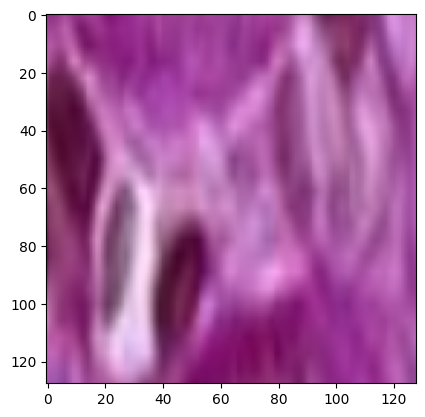

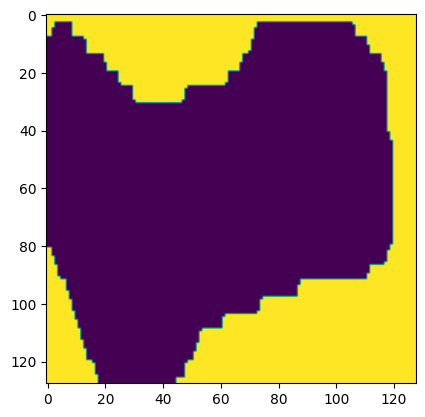

[  0 255]


In [12]:
import matplotlib.pyplot as plt
x = dataset[50]
print(x['img'].shape)
plt.imshow(x['img'].astype(np.uint8))
plt.show()
plt.imshow(x['gt_seg_map'])
plt.show()
print(np.unique(x['gt_seg_map']))